# Log-likehood 

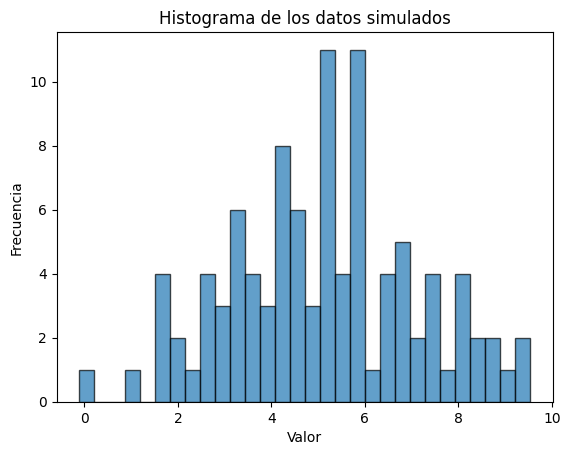

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros reales
mu_real = 5
sigma = 2

# Generar datos
np.random.seed(0)
data = np.random.normal(mu_real, sigma, 100)

# Visualizar datos
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de los datos simulados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


In [2]:
def log_likelihood(mu, data, sigma):
    n = len(data)
    return -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)


In [3]:
from scipy.optimize import minimize

# Función negativa de la log-verosimilitud
neg_log_likelihood = lambda mu: -log_likelihood(mu, data, sigma)

# Encontrar el valor óptimo de mu
result = minimize(neg_log_likelihood, x0=0)
mu_mle = result.x[0]

print(f'El estimador de máxima verosimilitud para mu es: {mu_mle}')


El estimador de máxima verosimilitud para mu es: 5.119616318537901


In [5]:
mu_muestral = np.mean(data)
print(f'La media muestral es: {mu_muestral}')


La media muestral es: 5.11961603106897


# Paso a Paso Cálculo completo de Log-Verosimilitud

# Función de verosimilitud

La función de verosimilitud es una función que mide la probabilidad de que los parámetros de un modelo generen los datos observados. En otras palabras, la función de verosimilitud mide qué tan bien se ajusta un modelo a los datos observados.

La función de verosimilitud se denota como $L(\theta | x)$, donde $\theta$ es el parámetro del modelo y $x$ es el conjunto de datos observados.

La función de verosimilitud se define como:

$$L(\theta | x) = P(x | \theta)$$

Donde $P(x | \theta)$ es la probabilidad de que los datos observados $x$ sean generados por el modelo con parámetros $\theta$.

# Log-verosimilitud

La log-verosimilitud es simplemente el logaritmo de la función de verosimilitud. La log-verosimilitud se denota como $l(\theta | x)$ y se define como:

$$l(\theta | x) = \log L(\theta | x)$$

La log-verosimilitud se utiliza comúnmente en la estadística para simplificar los cálculos y para convertir productos en sumas.

# Ejemplo

Supongamos que tenemos un modelo de regresión lineal simple con una sola variable independiente $x$ y una variable dependiente $y$. El modelo de regresión lineal simple se define como:

$$y = \beta_0 + \beta_1 x + \epsilon$$

Donde $\beta_0$ y $\beta_1$ son los parámetros del modelo y $\epsilon$ es el término de error.

La función de verosimilitud para el modelo de regresión lineal simple se define como:

$$L(\beta_0, \beta_1 | x, y) = P(y | \beta_0, \beta_1, x)$$

Donde $P(y | \beta_0, \beta_1, x)$ es la probabilidad de que los datos observados $y$ sean generados por el modelo de regresión lineal simple con parámetros $\beta_0$ y $\beta_1$.

La log-verosimilitud para el modelo de regresión lineal simple se define como:

$$l(\beta_0, \beta_1 | x, y) = \log L(\beta_0, \beta_1 | x, y)$$




# Función de Máxima Verosimilitud

La función de máxima verosimilitud mide qué tan probable es observar un conjunto de datos dados los parámetros del modelo. Para una distribución normal con media $\mu$ y desviación estándar conocida $\sigma$, la función de log-verosimilitud se deriva de la siguiente manera.

## Distribución Normal

La función de densidad de probabilidad de una distribución normal es:

$$
f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Para un conjunto de datos $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, la función de verosimilitud es:

$$
L(\mu | \mathbf{x}) = \prod_{i=1}^{n} f(x_i | \mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

## Función de Log-Verosimilitud

Es más conveniente trabajar con el logaritmo de la función de verosimilitud, conocido como log-verosimilitud. Tomando el logaritmo natural:

$$
l(\mu | \mathbf{x}) = \log L(\mu | \mathbf{x}) = \log \left( \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right) \right)
$$

Usando las propiedades del logaritmo:

$$
l(\mu | \mathbf{x}) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right) + \sum_{i=1}^{n} \log \left( \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right) \right)
$$

Simplificando:

$$
l(\mu | \mathbf{x}) = \sum_{i=1}^{n} \left( -\frac{1}{2} \log (2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

Agrupando términos:

$$
l(\mu | \mathbf{x}) = -\frac{n}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

## Implementación en Python

A continuación se muestra la implementación de la función de log-verosimilitud en Python:

```python
import numpy as np

def log_likelihood(mu, data, sigma):
    n = len(data)  # Número de datos
    # Calculamos la log-verosimilitud
    log_lik = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return log_lik


In [ ]:
def log_likelihood_seba(mu, sigma, data):
    n = len(data)
    return -n/2 * np.log(2*np.pi*sigma**2) - 1/(2*sigma**2) * np.sum((data-mu)**2)

### Explicación de los Términos

1. **Constante Normalizadora ($(-\frac{n}{2} \log (2\pi\sigma^2))$):**
   - Este término proviene del logaritmo de la constante de normalización de la distribución normal.
   - Para cada punto de datos $(x_i)$, la constante de normalización es $(\frac{1}{\sqrt{2\pi\sigma^2}})$. Al tomar el logaritmo y sumar sobre todos los datos, obtenemos $(n)$ veces el logaritmo de esta constante.
   - Esencialmente, este término ajusta la escala de la probabilidad para asegurar que la función de densidad de probabilidad se integre a uno.

2. **Suma de Cuadrados de las Desviaciones Normalizadas ($(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2)$):**
   - Este término mide la discrepancia entre los datos observados y la media propuesta $(\mu)$.
   - Para cada punto de datos $(x_i)$, calculamos el cuadrado de la diferencia entre el dato y la media propuesta, normalizado por la varianza $(\sigma^2)$.
   - La suma de estos términos sobre todos los datos nos da una medida total de esta discrepancia.
   - Multiplicar por $(-\frac{1}{2\sigma^2})$ ajusta esta medida para que coincida con la forma de la función de densidad de probabilidad de la distribución normal.

### Interpretación

- **Constante Normalizadora:**
  - Asegura que la densidad de probabilidad esté correctamente escalada.
  - No depende de los datos, pero sí del tamaño de la muestra $(n)$.

- **Suma de Cuadrados de las Desviaciones:**
  - Captura cuán bien la media propuesta $(\mu)$ describe los datos observados.
  - Al minimizar esta suma, encontramos la media que mejor se ajusta a los datos en términos de verosimilitud.

### Función de Log-Verosimilitud en Python

La función en Python que implementa esta log-verosimilitud es:

```python
import numpy as np

def log_likelihood(mu, data, sigma):
    n = len(data)  # Número de datos
    # Calculamos la log-verosimilitud
    log_lik = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return log_lik
```

### Parámetros de Entrada

- `mu`: La media propuesta de la distribución normal.
- `data`: Un array de datos observados.
- `sigma`: La desviación estándar conocida de la distribución normal.

### Términos de la Función

1. **Número de Datos (\( n \)):**
   - `n = len(data)`
   - Calcula el número de datos en el array `data`.

2. **Término Constante:**
   - `-n/2 * np.log(2 * np.pi * sigma**2)`
   - Este término ajusta la escala de la probabilidad para asegurar que la función de densidad de probabilidad se integre a uno.

3. **Suma de Cuadrados de las Desviaciones:**
   - `-1/(2 * sigma**2) * np.sum((data - mu)**2)`
   - Mide la discrepancia entre los datos observados y la media propuesta \( \mu \).

### Retorno

- La función retorna el valor de la log-verosimilitud `log_lik` para la media propuesta \( \mu \).

### Interpretación

- **Maximización:**
  - La estimación de máxima verosimilitud (MLE) se encuentra maximizando esta función de log-verosimilitud respecto a \( \mu \).
- **Negación para Minimización:**
  - Para utilizar un algoritmo de minimización (como `scipy.optimize.minimize`), minimizamos el negativo de esta función.

Espero que esta explicación te haya ayudado a entender la racionalidad detrás de cada uno de los términos de la función de verosimilitud de una distribución normal. Si tienes más preguntas, ¡no dudes en preguntar!

# Implementción de un paso de la función de log-verosimilitud

In [66]:
import numpy as np

# Parámetros reales
mu_real = 5
sigma = 2

# Generar datos simulados
np.random.seed(0)
data = np.random.normal(mu_real, sigma, 100)
print("Datos simulados:", data[:10])  # Mostramos los primeros 5 datos

# Definir la función de log-verosimilitud
def log_likelihood(mu, data, sigma):
    n = len(data)  # Número de datos
    # Calculamos la log-verosimilitud
    log_lik = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return log_lik

# Estimación inicial de mu
mu_initial = 0
print("Estimación inicial de mu:", mu_initial)

# Calcular la log-verosimilitud para la estimación inicial de mu
log_lik_initial = log_likelihood(mu_initial, data, sigma)
print("Log-verosimilitud inicial:", log_lik_initial)

# Definir la función para la derivada de la log-verosimilitud
def d_log_likelihood(mu, data, sigma):
    # Derivada de la log-verosimilitud con respecto a mu
    n = len(data)
    derivative = np.sum(data - mu) / sigma**2
    return derivative

# Calcular la derivada de la log-verosimilitud en mu inicial
derivative_initial = d_log_likelihood(mu_initial, data, sigma)
print("Derivada de la log-verosimilitud en mu inicial:", derivative_initial)

# Tasa de aprendizaje para la actualización de mu
learning_rate = 0.01

# Actualización de mu usando gradiente descendente
mu_updated = mu_initial + learning_rate * derivative_initial
print("Mu actualizado:", mu_updated)


Datos simulados: [8.52810469 5.80031442 6.95747597 9.4817864  8.73511598 3.04544424
 6.90017684 4.69728558 4.7935623  5.821197  ]
Estimación inicial de mu: 0
Log-verosimilitud inicial: -539.6307561569383
Derivada de la log-verosimilitud en mu inicial: 127.99040077672426
Mu actualizado: 1.2799040077672426


In [116]:
# Calcular la log-verosimilitud para la estimación inicial de mu
log_lik_initial = log_likelihood(mu_updated, data, sigma)
print("Log-verosimilitud nueva:", log_lik_initial)

# Calcular la derivada de la log-verosimilitud en mu inicial
derivative = d_log_likelihood(mu_updated, data, sigma)
print("Derivada de la log-verosimilitud:", derivative)

# Tasa de aprendizaje para la actualización de mu
learning_rate = 0.01

# Actualización de mu usando gradiente descendente
mu_updated += learning_rate * derivative
print("Mu actualizado:", mu_updated)

Log-verosimilitud nueva: -211.99990233731344
Derivada de la log-verosimilitud: 7.24837357837238e-05
Mu actualizado: 5.119613856556897
